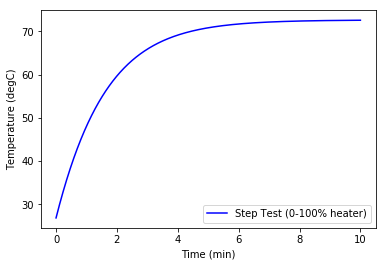

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define energy balance model
def heat(x,t,Q):
    # Parameters
    Ta = 23 + 273.15   # K
    U = 10.0           # W/m^2-K
    m = 4.0/1000.0     # kg
    Cp = 0.5 * 1000.0  # J/kg-K    
    A = 12.0 / 100.0**2 # Area in m^2
    alpha = 0.01       # W / % heater
    eps = 0.9          # Emissivity
    sigma = 5.67e-8    # Stefan-Boltzman

    # Temperature State 
    T = x[0]

    # Nonlinear Energy Balance
    dTdt = (1.0/(m*Cp))*(U*A*(Ta-T) \
            + eps * sigma * A * (Ta**4 - T**4) \
            + alpha*Q)
    return dTdt

Q = 100.0 # Percent Heater (0-100%)
T0 = 23.0 + 273.15 # Initial temperature
n = 60*10+1  # Number of second time points (10min)
time = np.linspace(0,n-1,n) # Time vector
T = odeint(heat,300.0,time,args=(Q,)) # Integrate ODE

# Plot results
plt.figure(1)
plt.plot(time/60.0,T-273.15,'b-')
plt.ylabel('Temperature (degC)')
plt.xlabel('Time (min)')
plt.legend(['Step Test (0-100% heater)'])
plt.show()